### Package loading

In [57]:
#General
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
#import combat
#from combat import combat
#import patsy

#Normalization
from sklearn.preprocessing import StandardScaler

#Outlier removal
import scipy
from scipy import stats
from scipy.stats import zscore

#Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [58]:
#pd.set_option('display.max_rows', 800)
#pd.set_option('display.max_columns', 800)

In [59]:
#Creating a dataframe from txt file

df = pd.read_csv('matrix_standard_a3zyc4.txt', delimiter = "\t", header = 0)

df

,Class,Lipid,Occurence,m/z,RTmin,RTmax,01pcDNA,02pcDNA,03pcDNA,04Creb3L1ACAoverex,05Creb3L1ACAoverex,06Creb3L1ACAoverex,07Scram,08Scram,09Scram,10siCreb3L1,11siCreb3L1,12siCreb3L1,BlankCal25,BlankCal5
0,GL02_DAG,2010003_34:0,NH4 1,614.57178,0.69,0.73,9.606318e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.876273e+06,0.000000,7.570892e+06,0.000000e+00,5.122567e+05,0.000000e+00,423398.265625
1,GL02_DAG,2010004_34:1,NH4 1,612.55615,0.72,0.73,6.375472e+06,0.000000e+00,5.112208e+06,2.347739e+06,4.847248e+06,0.000000e+00,4.532914e+06,7.177505e+06,0.000000,7.263642e+06,6.298830e+06,4.861257e+06,0.000000e+00,0.000000
2,GL02_DAG,2010008_38:0,NH4 1,670.63440,0.71,0.73,4.845203e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
3,GL02_DAG,2010010_32:1,NH4 1,584.52484,0.72,0.73,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.361093e+06,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.881084e+06,0.000000e+00,0.000000
4,GL02_DAG,2010011_32:2,NH4 1,582.50922,0.72,0.73,0.000000e+00,2.699994e+06,0.000000e+00,1.423795e+06,0.000000e+00,0.000000e+00,1.631554e+06,0.000000e+00,0.000000,2.247223e+06,0.000000e+00,2.397069e+06,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,SP05_HexCer,501AB15_36:0,H 1,892.67194,2.83,2.97,4.640684e+05,3.050191e+06,0.000000e+00,3.111991e+06,0.000000e+00,0.000000e+00,1.293674e+06,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,9.575011e+05,0.000000e+00,0.000000
2350,SP05_HexCer,501AB15_36:0,H 2,892.67194,4.49,4.57,1.096605e+06,0.000000e+00,5.850100e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2351,SP05_HexCer,502AU05_42:1,NH4 1,1461.94031,4.58,4.58,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.792617e+06,0.000000
2352,SP05_HexCer,503AN01_34:1,NH4 1,1285.81030,4.42,4.48,0.000000e+00,0.000000e+00,3.245058e+05,0.000000e+00,2.791937e+05,0.000000e+00,4.046390e+05,4.340519e+05,339933.195312,4.275727e+05,3.612745e+05,4.285995e+05,0.000000e+00,0.000000


In [60]:
#Selection of important characters on columns Class and Lipid

Class2 = []
for row in df['Class']:
    row = row.split('_')
    if row[1] == 'PxCer':
        Class2.append('SM')
    else:
        Class2.append(row[1])
    
df.insert(0, 'Class2', Class2)

Lipid2 = []
for row in df['Lipid']:
    row = row.split('_')
    if row[0] == '1deoxyCer':
        Lipid2.append(f'1deoxyCer({row[1]})')
    elif row[0].startswith('EX'):
        Lipid2.append(f'EX({row[1]})')
    else:
        Lipid2.append(f'({row[1]})')
    
df.insert(2, 'Lipid2', Lipid2)

<AxesSubplot:>

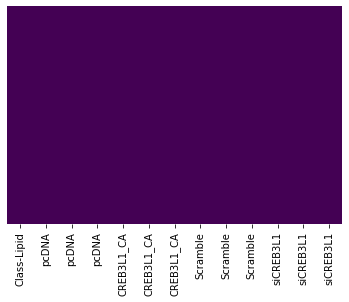

In [61]:
#Elimination of unnecesary columns
df['Class-Lipid'] = df['Class2'] + df['Lipid2']
first_col = df.pop('Class-Lipid')
df.insert(0, 'Class-Lipid', first_col)
df = df.drop(['BlankCal25','BlankCal5','Occurence','m/z','RTmin','RTmax', 'Class', 'Lipid', 'Class2', 'Lipid2'], axis = 1)
#Rename Columns
df = df.rename(columns = {'01pcDNA': 'pcDNA', '02pcDNA': 'pcDNA', '03pcDNA': 'pcDNA',
                          '04Creb3L1ACAoverex': 'CREB3L1_CA', '05Creb3L1ACAoverex': 'CREB3L1_CA', '06Creb3L1ACAoverex': 'CREB3L1_CA',
                          '07Scram': 'Scramble', '08Scram': 'Scramble', '09Scram': 'Scramble',
                          '10siCreb3L1': 'siCREB3L1', '11siCreb3L1': 'siCREB3L1', '12siCreb3L1': 'siCREB3L1'}
               , inplace = False)

sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

<AxesSubplot:>

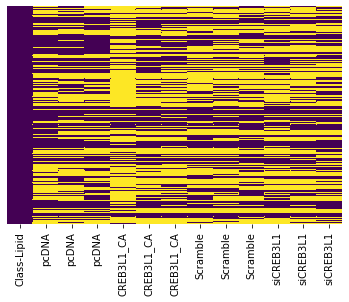

In [62]:
#transform 0 to nans
df.replace(0, np.nan, inplace=True)
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

<AxesSubplot:>

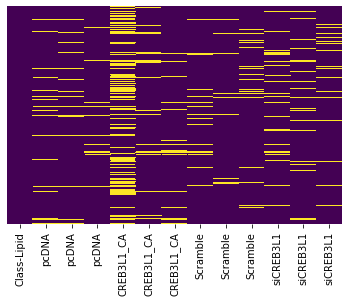

In [63]:
# dropping the NaNs, treshols 7 means that those rows with at least 7 non-NaN values are kept
df = df.dropna(axis=0, how='any', thresh=8, inplace=False)
df = df.reset_index(drop = True)
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

In [78]:
#transpose of the dataframe
df_t = df.T
df_t = df_t.reset_index(drop = False)
#df_t = df_t.convert_dtypes()
df_t

,index,0,1,2,3,4,5,6,7,8,...,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122
0,Class-Lipid,DAG(34:1),DAG(33:2),DAG(34:2),DAG(35:1),DAG(35:2),DAG(36:1),DAG(36:3),DAG(37:1),DAG(36:4),...,GlcCer(34:1),GlcCer(26:1),HexCer(41:0),HexCer(34:1),HexCer(36:1),HexCer(36:2),HexCer(38:2),HexCer(32:2),HexCer(34:2),HexCer(34:1)
1,pcDNA,6375471.875,3134347.890625,5118185.25,NaN,2481145.734375,4901358.6875,3272995.03125,2390757.21875,1025467.015625,...,7701843.0625,47319498.6875,NaN,612375.793457,611682.876465,7028293.78125,2557555.378906,30557231.5625,15069394.84375,NaN
2,pcDNA,NaN,NaN,4654960.8125,NaN,2573727.625,NaN,3394526.6875,1958704.378906,1520593.835938,...,12095161.46875,59912396.875,296724.526367,532203.037109,485371.884766,6660802.96875,2379029.097656,27452437.609375,13743588.984375,NaN
3,pcDNA,5112208.25,NaN,4195878.5625,NaN,1761541.992188,4192781.875,NaN,1911641.128906,NaN,...,9821257.15625,55305568.1875,261487.811523,423245.957031,344309.837891,4963913.078125,1864227.509766,18364569.296875,9442878.875,324505.839844
4,CREB3L1_CA,2347739.144531,NaN,NaN,1751452.483398,1227126.8125,1644034.523438,NaN,1214368.782227,NaN,...,4009766.5625,NaN,NaN,NaN,NaN,7533577.671875,2245625.699219,20877884.796875,14120758.390625,NaN
5,CREB3L1_CA,4847248.5,1797590.984375,2445169.71875,2011625.363281,1880423.539062,3745369.90625,1343966.109375,NaN,NaN,...,11497595.984375,55391120.0625,348550.621094,474987.929688,480777.253906,7508730.960938,2843088.316406,24283537.703125,14208734.1875,279193.708984
6,CREB3L1_CA,NaN,2475491.609375,3032505.1875,2445076.242188,2021349.710938,3772067.5625,NaN,2072840.605469,274575.90625,...,10489575.640625,52132777.5,462809.164062,473457.42627,500688.621094,7582586.140625,2832982.238281,25042501.59375,14955340.03125,NaN
7,Scramble,4532914.445312,2276403.6875,2328098.53125,NaN,1661810.90625,3178970.183594,1619319.273438,1563393.265625,308386.484375,...,13134458.03125,58377244.9375,429518.736328,532737.068359,313113.994141,4104345.042969,941591.785156,15002421.75,10216032.015625,404638.96875
8,Scramble,7177505.0625,2212196.703125,3235176.125,2548320.960938,2232062.390625,5048634.0,2281613.15625,2002766.853516,473292.460938,...,17306575.46875,54674052.0,369189.160645,600282.666016,318730.027344,4574357.078125,1090117.851562,16372927.734375,11887475.84375,434051.920898
9,Scramble,NaN,NaN,3533363.90625,NaN,1759165.125,NaN,NaN,1875128.554688,360009.910156,...,14440170.625,58828814.125,326853.726562,531620.582031,290393.521484,4180615.570312,1078248.546875,14911050.265625,10298135.03125,339933.195312


<AxesSubplot:>

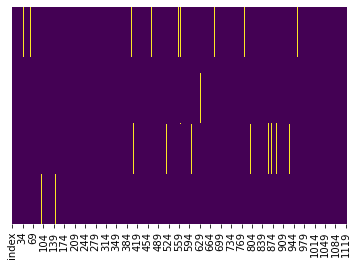

In [79]:
#group by condition and fill nan with the mean of the condition
df_t = df_t.groupby(['index']).apply(lambda x: x.fillna(x.mean()))
df_t = df_t.reset_index(drop = True)
sns.heatmap(df_t.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

<AxesSubplot:>

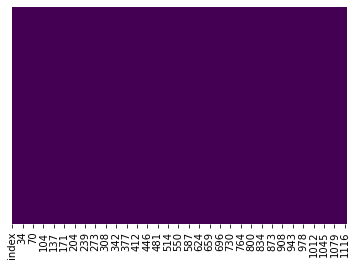

In [80]:
#droppping the rest of the Nans
df_t = df_t.dropna(axis=1, inplace=False)
sns.heatmap(df_t.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

In [81]:
df_t = df_t.rename(columns=df_t.iloc[3])
df_t.drop(3,0,inplace=True)
df_t

,Class-Lipid,DAG(34:1),DAG(33:2),DAG(34:2),DAG(35:2),DAG(36:1),DAG(36:3),DAG(37:1),DAG(36:4),DAG(37:2),...,GlcCer(34:1),GlcCer(26:1),HexCer(41:0),HexCer(34:1),HexCer(36:1),HexCer(36:2),HexCer(38:2),HexCer(32:2),HexCer(34:2),HexCer(34:1)
0,CREB3L1_CA,2347739.144531,2136541.296875,2738837.453125,1227126.8125,1644034.523438,1343966.109375,1214368.782227,274575.90625,2044461.25,...,4009766.5625,53761948.78125,405679.892578,474222.677979,490732.9375,7533577.671875,2245625.699219,20877884.796875,14120758.390625,279193.708984
1,CREB3L1_CA,4847248.5,1797590.984375,2445169.71875,1880423.539062,3745369.90625,1343966.109375,1643604.693848,274575.90625,1713288.78125,...,11497595.984375,55391120.0625,348550.621094,474987.929688,480777.253906,7508730.960938,2843088.316406,24283537.703125,14208734.1875,279193.708984
2,CREB3L1_CA,3597493.822266,2475491.609375,3032505.1875,2021349.710938,3772067.5625,1343966.109375,2072840.605469,274575.90625,2375633.71875,...,10489575.640625,52132777.5,462809.164062,473457.42627,500688.621094,7582586.140625,2832982.238281,25042501.59375,14955340.03125,279193.708984
4,Scramble,4532914.445312,2276403.6875,2328098.53125,1661810.90625,3178970.183594,1619319.273438,1563393.265625,308386.484375,1565437.585938,...,13134458.03125,58377244.9375,429518.736328,532737.068359,313113.994141,4104345.042969,941591.785156,15002421.75,10216032.015625,404638.96875
5,Scramble,7177505.0625,2212196.703125,3235176.125,2232062.390625,5048634.0,2281613.15625,2002766.853516,473292.460938,2209107.070312,...,17306575.46875,54674052.0,369189.160645,600282.666016,318730.027344,4574357.078125,1090117.851562,16372927.734375,11887475.84375,434051.920898
6,Scramble,5855209.753906,2244300.195312,3533363.90625,1759165.125,4113802.091797,1950466.214844,1875128.554688,360009.910156,2496017.28125,...,14440170.625,58828814.125,326853.726562,531620.582031,290393.521484,4180615.570312,1078248.546875,14911050.265625,10298135.03125,339933.195312
7,pcDNA,6375471.875,3134347.890625,5118185.25,2481145.734375,4901358.6875,3272995.03125,2390757.21875,1025467.015625,2632323.859375,...,7701843.0625,47319498.6875,279106.168945,612375.793457,611682.876465,7028293.78125,2557555.378906,30557231.5625,15069394.84375,324505.839844
8,pcDNA,5743840.0625,3134347.890625,4654960.8125,2573727.625,4547070.28125,3394526.6875,1958704.378906,1520593.835938,2303442.96875,...,12095161.46875,59912396.875,296724.526367,532203.037109,485371.884766,6660802.96875,2379029.097656,27452437.609375,13743588.984375,324505.839844
9,pcDNA,5112208.25,3134347.890625,4195878.5625,1761541.992188,4192781.875,3333760.859375,1911641.128906,1273030.425781,1974562.078125,...,9821257.15625,55305568.1875,261487.811523,423245.957031,344309.837891,4963913.078125,1864227.509766,18364569.296875,9442878.875,324505.839844
10,siCREB3L1,7263641.875,2002217.84375,3500061.46875,2187210.15625,4806820.125,1630895.515625,2595901.957031,405422.625,2037235.375,...,16127814.65625,52611391.0625,266254.851562,596289.566406,420262.035156,4164344.617188,968627.046875,15864430.328125,10195604.265625,427572.650391


In [82]:
df_t.iloc[:,1:] = df_t.iloc[:,1:].div(df_t.iloc[:,1:]['PCEX(34:1)'], axis=0)
df_t = df_t.drop(['PCEX(34:1)'], axis = 1)

In [83]:
#transform the data to log2

df_t.iloc[:,1:] = df_t.iloc[:,1:].transform(lambda x: np.log2(x.astype('float64')))
df_t

/opt/anaconda3/envs/lipidomics/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/anaconda3/envs/lipidomics/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,Class-Lipid,DAG(34:1),DAG(33:2),DAG(34:2),DAG(35:2),DAG(36:1),DAG(36:3),DAG(37:1),DAG(36:4),DAG(37:2),...,GlcCer(34:1),GlcCer(26:1),HexCer(41:0),HexCer(34:1),HexCer(36:1),HexCer(36:2),HexCer(38:2),HexCer(32:2),HexCer(34:2),HexCer(34:1)
0,CREB3L1_CA,-10.183803,-10.319798,-9.961512,-11.119791,-10.697835,-10.988579,-11.134869,-13.279799,-10.383355,...,-9.411557,-5.666562,-12.716662,-12.491439,-12.442066,-8.50174,-10.247958,-7.031172,-7.59533,-13.255737
1,CREB3L1_CA,-8.844818,-10.27592,-9.83205,-10.210927,-9.216876,-10.695488,-10.405121,-12.986708,-10.345216,...,-7.598724,-5.330402,-12.642544,-12.196022,-12.178544,-8.213415,-9.614526,-6.520078,-7.293278,-12.962646
2,CREB3L1_CA,-9.618247,-10.157524,-9.864729,-10.449921,-9.549884,-11.038743,-10.41363,-13.329963,-10.216927,...,-8.074355,-5.761121,-12.57675,-12.543933,-12.463254,-8.542549,-9.962918,-6.818933,-7.562651,-13.305901
4,Scramble,-8.659028,-9.65271,-9.620315,-10.106711,-9.170907,-10.144079,-10.194786,-12.536655,-10.192901,...,-7.124182,-4.972133,-12.058674,-11.747971,-12.514707,-8.802315,-10.926293,-6.932343,-7.486704,-12.14476
5,Scramble,-8.354841,-10.052844,-9.504479,-10.039946,-8.86243,-10.008269,-10.196329,-12.27752,-10.05486,...,-7.085075,-5.425539,-12.635891,-11.93461,-12.847917,-9.004755,-11.073839,-7.165083,-7.626953,-12.402384
6,Scramble,-8.28803,-9.671486,-9.016709,-10.02286,-8.797279,-9.873932,-9.930762,-12.311643,-9.518123,...,-6.985735,-4.9593,-12.451034,-11.749282,-12.62167,-8.774036,-10.729062,-6.939441,-7.47344,-12.394428
7,pcDNA,-8.83685,-9.861217,-9.15375,-10.198376,-9.216201,-9.798771,-10.251915,-11.473102,-10.113046,...,-8.564179,-5.94502,-13.350497,-12.216893,-12.218527,-8.696208,-10.154617,-6.575941,-7.595833,-13.133066
8,pcDNA,-8.605358,-9.479209,-8.908605,-9.763515,-8.942437,-9.364164,-10.157474,-10.522739,-9.923582,...,-7.531016,-5.222591,-12.880178,-12.037325,-12.170212,-8.391678,-9.877001,-6.348512,-7.346687,-12.751058
9,pcDNA,-8.570589,-9.276371,-8.855563,-10.107697,-8.856628,-9.187385,-9.989724,-10.576269,-9.943003,...,-7.628628,-5.135183,-12.85972,-12.164968,-12.462757,-8.613058,-10.025958,-6.725683,-7.685309,-12.54822
10,siCREB3L1,-8.45237,-10.311464,-9.505682,-10.183971,-9.04798,-10.607398,-9.936827,-12.615564,-10.28645,...,-7.301584,-5.595759,-13.222183,-12.058978,-12.563702,-9.254973,-11.359049,-7.325339,-7.963187,-12.538821


In [84]:
#calculate z_score

z_scores = df_t.iloc[:,1:].transform(lambda x : zscore(x.astype('float64'),ddof=1))

In [85]:
#merge z_score with Lipid-Class column to create df_final

df_final_pccl3_creb3l1 = pd.concat([df_t.iloc[:,:1], z_scores], axis = 1)

In [ ]:
df_final_pccl3_creb3l1 = df_t.T

In [53]:
df_final_pccl3_creb3l1

,Class-Lipid,DAG(34:1),DAG(33:2),DAG(34:2),DAG(35:2),DAG(36:1),DAG(36:3),DAG(37:1),DAG(36:4),DAG(37:2),...,GlcCer(34:1),GlcCer(26:1),HexCer(41:0),HexCer(34:1),HexCer(36:1),HexCer(36:2),HexCer(38:2),HexCer(32:2),HexCer(34:2),HexCer(34:1)
1,pcDNA,0.036023,0.157945,0.829088,0.125101,0.112401,0.758260,0.102127,0.865171,0.192782,...,-1.276502,-1.728982,-1.812501,-0.588224,1.188680,0.109663,0.601009,1.048007,-0.037016,-1.022175
2,pcDNA,0.459924,1.227398,1.411636,1.440237,0.641599,1.429475,0.393434,1.857085,0.851701,...,0.173216,0.585086,-0.409246,0.021239,1.436298,1.136276,1.073373,1.803533,1.330672,-0.018348
3,pcDNA,0.523592,1.795253,1.537682,0.399338,0.807471,1.702494,0.910868,1.801215,0.784158,...,0.036248,0.865070,-0.348208,-0.411986,-0.063013,0.389973,0.819922,0.550559,-0.528196,0.514662
4,CREB3L1_CA,-2.430474,-1.125877,-1.090430,-2.661503,-2.751666,-1.079299,-2.621394,-1.020517,-0.747305,...,-2.465530,-0.837032,0.078625,-1.520045,0.043030,0.765240,0.442189,-0.464285,-0.034254,-1.344525
5,CREB3L1_CA,0.021433,-1.003036,-0.782784,0.087144,0.111095,-0.626644,-0.370446,-0.714611,-0.614665,...,0.078209,0.239750,0.299763,-0.517384,1.393594,1.737223,1.519976,1.233585,1.623859,-0.574352
6,CREB3L1_CA,-1.394846,-0.671582,-0.860442,-0.635636,-0.532624,-1.156773,-0.396693,-1.072874,-0.168499,...,-0.589189,-1.139920,0.496069,-1.698211,-0.065562,0.627667,0.927185,0.240780,0.145139,-1.476344
7,Scramble,0.361646,0.741670,-0.279629,0.402321,0.199955,0.224960,0.278343,-0.244882,-0.084940,...,0.744079,1.387350,2.041814,1.003320,-0.329263,-0.248037,-0.712000,-0.135974,0.562049,1.574858
8,Scramble,0.918664,-0.378524,-0.004364,0.604235,0.796255,0.434707,0.273585,0.025583,0.395140,...,0.798953,-0.064992,0.319613,0.369861,-2.036983,-0.930489,-0.963050,-0.909142,-0.207849,0.897883
9,Scramble,1.041005,0.689108,1.154745,0.655907,0.922196,0.642180,1.092741,-0.010032,2.261813,...,0.938345,1.428455,0.871158,0.998870,-0.877455,-0.152705,-0.376410,-0.159553,0.634861,0.918789
10,siCREB3L1,0.740073,-1.102543,-0.007223,0.168666,0.437580,-0.490597,1.074034,-0.327241,-0.410287,...,0.495152,-0.610238,-1.429661,-0.052250,-0.580363,-1.774010,-1.448336,-1.441517,-2.053609,0.539359


In [ ]:
df_final_pccl3_creb3l1 = df_final_pccl3_creb3l1.reset_index(drop = False)

In [ ]:
df_final_pccl3_creb3l1 = df_final_pccl3_creb3l1.rename(columns=df_final_pccl3_creb3l1.iloc[0])
df_final_pccl3_creb3l1 = df_final_pccl3_creb3l1.iloc[1: , :]
df_final_pccl3_creb3l1

In [ ]:
df_final_pccl3_creb3l1

In [ ]:
# convert values to float64

df_final_pccl3_creb3l1 = df_final_pccl3_creb3l1.convert_dtypes(infer_objects=True, convert_floating=True)

In [ ]:
#save to csv
df_final_pccl3_creb3l1.to_csv('pccl3_creb3l1.csv')

In [86]:
#Plot
df2 = df_final_pccl3_creb3l1.copy()
df2 = df2.set_index('Class-Lipid', drop = True)


#Clustermap

ax = sns.clustermap(df2,
                    #z_score = 1,
                    cmap="vlag",
                    #center=0, 
                    #vmin = -1,
                    #vmax = 1,
                    yticklabels=True,
                    xticklabels=True,
                    figsize=(125, 125),
                    linewidth=.5)

plt.title('Cluster map of Kinase-Lipid before batch correction -Non-normalized-', fontsize = 60) # title with fontsize 20
plt.xlabel('Lipids', fontsize = 80) # x-axis label with fontsize 15
plt.ylabel('Treatment', fontsize =80) # y-axis label with fontsize 15

#ax.savefig("databeforecombat.png")

/opt/anaconda3/envs/lipidomics/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(2418.931818181818, 0.5, 'Treatment')

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

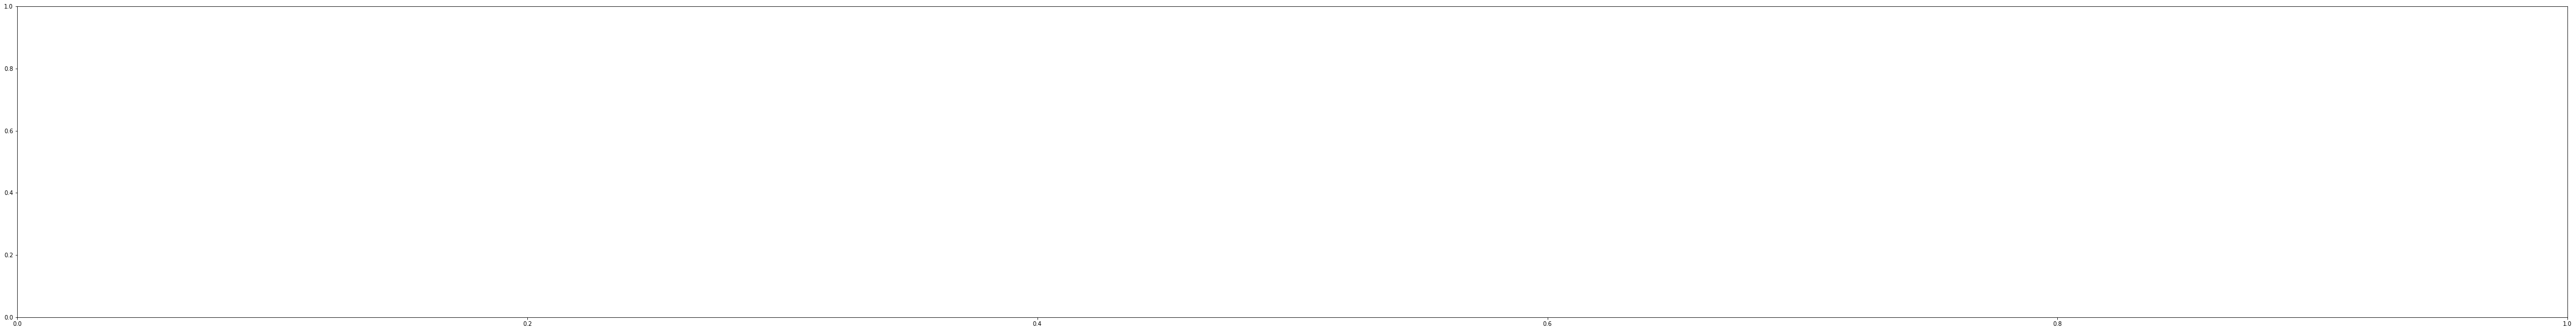

In [87]:
fig, ax = plt.subplots(figsize=(80,10))
ax = sns.heatmap(df2,
                 #vmin=-3,
                 #vmax=3,
                 cmap="YlGnBu",
                 linewidths=.1,
                center = 'pcDNA')
#fig.savefig("pccl3_creb3l1.png")

In [ ]:
scaler = StandardScaler()
sns.heatmap(scaler.fit_transform(df.to_numpy()))

In [24]:
df2.dtypes

DAG(34:1)       float64
DAG(33:2)       float64
DAG(34:2)       float64
DAG(35:2)       float64
DAG(36:1)       float64
                 ...   
HexCer(36:2)    float64
HexCer(38:2)    float64
HexCer(32:2)    float64
HexCer(34:2)    float64
HexCer(34:1)    float64
Length: 1061, dtype: object

In [ ]:
#Merging of the datasets of all the lipids

data_concat = pd.concat([data_cl, data_n1,data_p1,data_p2], axis=1)
data_concat = data_concat.loc[:,~data_concat.columns.duplicated()]

# And the cell number
data_concat = data_concat.merge(data_cn, on='CP0_ID.BR')

In [ ]:
#Elimination of unnecesary columns
data_concat = data_concat.drop(['Unnamed: 0','CP0_ID.BR','BR','CP0_ID','CP_plate','GENE_y','Series', 'Cell area covered by objects (%)'], axis=1)

In [ ]:
#Same process as before but for cell number
data_concat['Cell number'] = data_concat['Cell number'].apply(pd.to_numeric, errors='coerce')
data_concat = data_concat.groupby(['GENE_x','Batch']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat = data_concat.groupby(['GENE_x']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)

In [ ]:
# Loading / Saving dataset

data_concat.to_csv('rawdata_allkinases.csv')
#data_concat = pd.read_csv('data_concat.csv')
#data_concat = data_concat.drop(['Unnamed: 0'], axis=1)

In [ ]:
# Normalising the data by Cell Number
data_concat.iloc[:,2:756] = data_concat.iloc[:,2:756].div(data_concat['Cell number'], axis=0)
data_concat = data_concat.drop(['Cell number'], axis=1)

In [ ]:
#Outliers removal INSIDE BATCH (z-score > 3)
z_scores = data_concat.groupby(['GENE','Batch']).transform(lambda x : zscore(x,ddof=1))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_concat.iloc[:,2:755] = data_concat.iloc[:,2:755][filtered_entries]

In [ ]:
#Fill the NaNs generated by the removal of the outliers with the mean

data_concat = data_concat.groupby(['GENE','Batch']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat = data_concat.groupby(['GENE']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat.iloc[:,2:755] = data_concat.iloc[:,2:755].apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)

In [ ]:
#Outliers removal OVERALL (z-score > 3)
z_scores = data_concat.iloc[:,2:755].transform(lambda x : zscore(x,ddof=1))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_concat.iloc[:,2:755] = data_concat.iloc[:,2:755][filtered_entries]

In [ ]:
#Fill the NaNs generated by the removal of the outliers with the mean

data_concat = data_concat.groupby(['GENE','Batch']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat = data_concat.groupby(['GENE']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat.iloc[:,2:755] = data_concat.iloc[:,2:755].apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)

In [ ]:
#Transform the data to log10 (OPTIONAL)

#data_log = data_concat
#data_log.iloc[:,2:755] = np.log10(data_log.iloc[:,2:755])

In [ ]:
# Taking the mean for each kinase

concat_mean = data_concat.groupby(['GENE_x']).mean().reset_index()
concat_mean = concat_mean.drop(['Batch'], axis=1)

In [ ]:
#NORMALIZATION USING STANDARD SCALER
scaler = StandardScaler()

concat_mean.iloc[:,2:756] = scaler.fit_transform(concat_mean.iloc[:,2:756].to_numpy())

In [ ]:
#MAKE GENE AS INDEX
concat_mean.set_index('GENE_x', inplace=True)

In [ ]:
#Filtering all the same lipids in one column / grouped by the name of lipids

filter_col_SM = [col for col in batch if col.startswith('SM')]
filter_col_GlcCer = [col for col in batch if col.startswith('Glc')]
filter_col_Cer = [col for col in batch if col.startswith('DHCer')] + [col for col in batch if col.startswith('Cer')]
filter_col_CL = [col for col in batch if col.startswith('CL')]
filter_col_LysoPC = [col for col in batch if col.startswith('LysoPC')]
filter_col_PC = [col for col in batch if col.startswith('PC')]
filter_col_LysoPE = [col for col in batch if col.startswith('LysoPE')]
filter_col_PE = [col for col in batch if col.startswith('PE')]
filter_col_LysoPI = [col for col in batch if col.startswith('LysoPI')]
filter_col_PI = [col for col in batch if col.startswith('PI')]
filter_col_LysoPS = [col for col in batch if col.startswith('LysoPS')]
filter_col_PS = [col for col in batch if col.startswith('PS')]

lipids_sum = filter_col_CL + filter_col_LysoPC + filter_col_PC + filter_col_LysoPE + filter_col_PE + filter_col_SM + filter_col_GlcCer + filter_col_Cer + filter_col_LysoPI + filter_col_PI + filter_col_LysoPS + filter_col_PS

In [ ]:
#Sum up all the all the lipids with the same head-group

batch['CL_Sum'] = batch[filter_col_CL].sum(axis=1)
batch['LysoPC_Sum'] = batch[filter_col_LysoPC].sum(axis=1)
batch['PC_Sum'] = batch[filter_col_PC].sum(axis=1)
batch['LysoPE_Sum'] = batch[filter_col_LysoPE].sum(axis=1)
batch['PE_Sum'] = batch[filter_col_PE].sum(axis=1)
batch['SM_Sum'] = batch[filter_col_SM].sum(axis=1)
batch['GlcCer_Sum'] = batch[filter_col_GlcCer].sum(axis=1)
batch['Cer_Sum'] = batch[filter_col_Cer].sum(axis=1)
batch['LysoPI_Sum'] = batch[filter_col_LysoPI].sum(axis=1)
batch['PI_Sum'] = batch[filter_col_PI].sum(axis=1)
batch['LysoPS_Sum'] = batch[filter_col_LysoPS].sum(axis=1)
batch['PS_Sum'] = batch[filter_col_PS].sum(axis=1)

In [ ]:
# Eliminate non-essential columns and keep only the sumed-up ones

features_sum = ['GENE', 'Batch', 'CL_Sum', 'LysoPC_Sum', 'PC_Sum',
                'LysoPE_Sum', 'PE_Sum', 'SM_Sum', 'GlcCer_Sum', 'Cer_Sum',
                'LysoPI_Sum', 'PI_Sum', 'LysoPS_Sum', 'PS_Sum']
batch_sum = batch[features_sum]

In [ ]:
pd.set_option('display.max_rows', 800)
batch_sum_mean

In [ ]:
#Calculate z-score
from scipy.stats import zscore
zlog_batch = log_batch.apply(zscore)